In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the stock price data
data = pd.read_csv("social media stocks 2012-2022.csv")
data = {"Open": 10.5, "High": 11.2, "Low": 10.1}["Close"]  # Example data dictionary


# Scale the data
data = data / data.max()

# Split the data into train and test sets
train_data = data[:-100]
test_data = data[-100:]

# Create the LSTM model
model = Sequential()
model.add(LSTM(128, activation="tanh", input_shape=(1, 1)))
model.add(Dense(1, activation="linear"))

# Train the model
model.compile(loss="mse", optimizer="adam")
model.fit(train_data, train_data, epochs=100)

# Predict the test data
predictions = model.predict(test_data)

# Plot the predictions
plt.plot(test_data, label="Actual")
plt.plot(predictions, label="Predicted")
plt.legend()
plt.show()


KeyError: ignored

Epoch 1/100
260/260 [==============================] - 4s 5ms/step - loss: 0.0135
Epoch 2/100
260/260 [==============================] - 1s 4ms/step - loss: 3.0700e-05
Epoch 3/100
260/260 [==============================] - 1s 5ms/step - loss: 2.3428e-05
Epoch 4/100
260/260 [==============================] - 1s 4ms/step - loss: 1.6699e-05
Epoch 5/100
260/260 [==============================] - 1s 4ms/step - loss: 1.0159e-05
Epoch 6/100
260/260 [==============================] - 1s 4ms/step - loss: 5.6902e-06
Epoch 7/100
260/260 [==============================] - 2s 6ms/step - loss: 2.6879e-06
Epoch 8/100
260/260 [==============================] - 2s 6ms/step - loss: 1.0948e-06
Epoch 9/100
260/260 [==============================] - 1s 6ms/step - loss: 3.6083e-07
Epoch 10/100
260/260 [==============================] - 1s 5ms/step - loss: 1.0258e-07
Epoch 11/100
260/260 [==============================] - 1s 5ms/step - loss: 3.4960e-08
Epoch 12/100
260/260 [==============================] - 

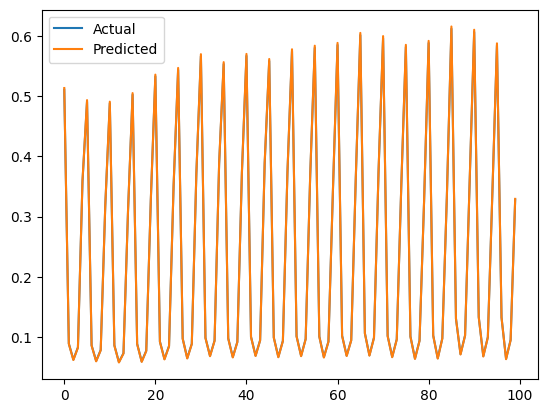

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the stock price data
data = pd.read_csv("social media stocks 2012-2022.csv")

# Scale the data
data["Close"] = data["Close"] / data["Close"].max()

# Split the data into train and test sets
train_data = data["Close"][:-100]
test_data = data["Close"][-100:]

# Reshape the data for LSTM input
train_data = np.reshape(train_data.values, (len(train_data), 1, 1))

# Create the LSTM model
model = Sequential()
model.add(LSTM(128, activation="tanh", input_shape=(1, 1)))
model.add(Dense(1, activation="linear"))

# Train the model
model.compile(loss="mse", optimizer="adam")
model.fit(train_data, train_data, epochs=100)

# Reshape the test data for prediction
test_data = np.reshape(test_data.values, (len(test_data), 1, 1))

# Predict the test data
predictions = model.predict(test_data)

# Plot the predictions
plt.plot(test_data.reshape(-1), label="Actual")
plt.plot(predictions.reshape(-1), label="Predicted")
plt.legend()
plt.show()


Epoch 1/100
260/260 [==============================] - 4s 5ms/step - loss: 0.0136
Epoch 2/100
260/260 [==============================] - 1s 5ms/step - loss: 3.0677e-05
Epoch 3/100
260/260 [==============================] - 1s 4ms/step - loss: 2.3942e-05
Epoch 4/100
260/260 [==============================] - 1s 5ms/step - loss: 1.7113e-05
Epoch 5/100
260/260 [==============================] - 2s 8ms/step - loss: 1.0974e-05
Epoch 6/100
260/260 [==============================] - 2s 8ms/step - loss: 6.3581e-06
Epoch 7/100
260/260 [==============================] - 1s 5ms/step - loss: 3.2238e-06
Epoch 8/100
260/260 [==============================] - 1s 5ms/step - loss: 1.3860e-06
Epoch 9/100
260/260 [==============================] - 1s 5ms/step - loss: 5.2722e-07
Epoch 10/100
260/260 [==============================] - 1s 5ms/step - loss: 1.6869e-07
Epoch 11/100
260/260 [==============================] - 1s 5ms/step - loss: 5.7173e-08
Epoch 12/100
260/260 [==============================] - 

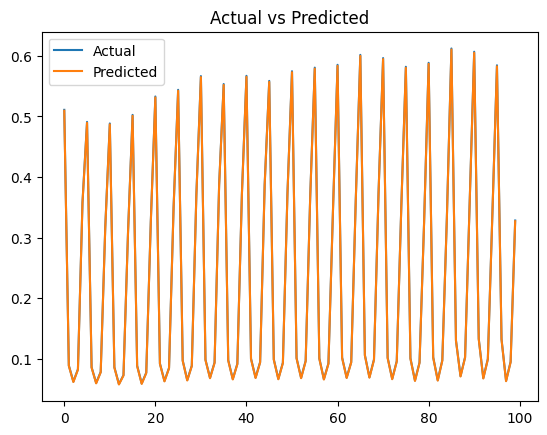

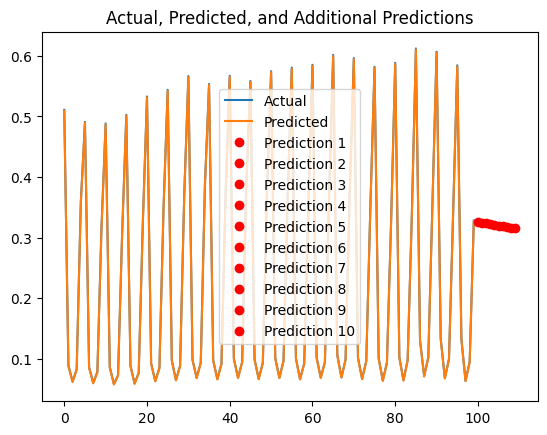

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the stock price data
data = pd.read_csv("social media stocks 2012-2022.csv")

# Scale the data
data["Close"] = data["Close"] / data["Close"].max()

# Split the data into train and test sets
train_data = data["Close"][:-100]
test_data = data["Close"][-100:]

# Reshape the data for LSTM input
train_data = np.reshape(train_data.values, (len(train_data), 1, 1))

# Create the LSTM model
model = Sequential()
model.add(LSTM(128, activation="tanh", input_shape=(1, 1)))
model.add(Dense(1, activation="linear"))

# Train the model
model.compile(loss="mse", optimizer="adam")
model.fit(train_data, train_data, epochs=100)

# Reshape the test data for prediction
test_data = np.reshape(test_data.values, (len(test_data), 1, 1))

# Predict the test data
predictions = model.predict(test_data)

# Generate additional predictions
num_predictions = 10  # Number of additional predictions to generate
additional_predictions = []

# Use the last prediction as the initial input for generating subsequent predictions
input_data = np.reshape(predictions[-1], (1, 1, 1))

for _ in range(num_predictions):
    # Generate the next prediction
    next_prediction = model.predict(input_data)
    additional_predictions.append(next_prediction)

    # Update the input data for the next iteration
    input_data = np.reshape(next_prediction, (1, 1, 1))

# Plot the actual and predicted values
plt.plot(test_data.reshape(-1), label="Actual")
plt.plot(predictions.reshape(-1), label="Predicted")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

# Plot the additional predictions
plt.plot(test_data.reshape(-1), label="Actual")
plt.plot(predictions.reshape(-1), label="Predicted")
for i, pred in enumerate(additional_predictions):
    plt.plot([len(predictions) + i], pred, 'ro', label=f"Prediction {i+1}")
plt.title("Actual, Predicted, and Additional Predictions")
plt.legend()
plt.show()


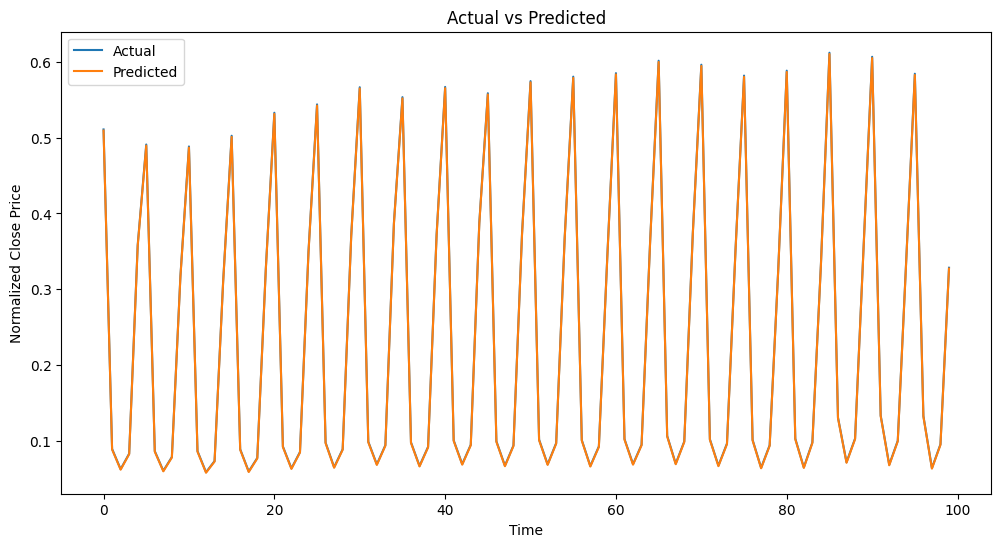

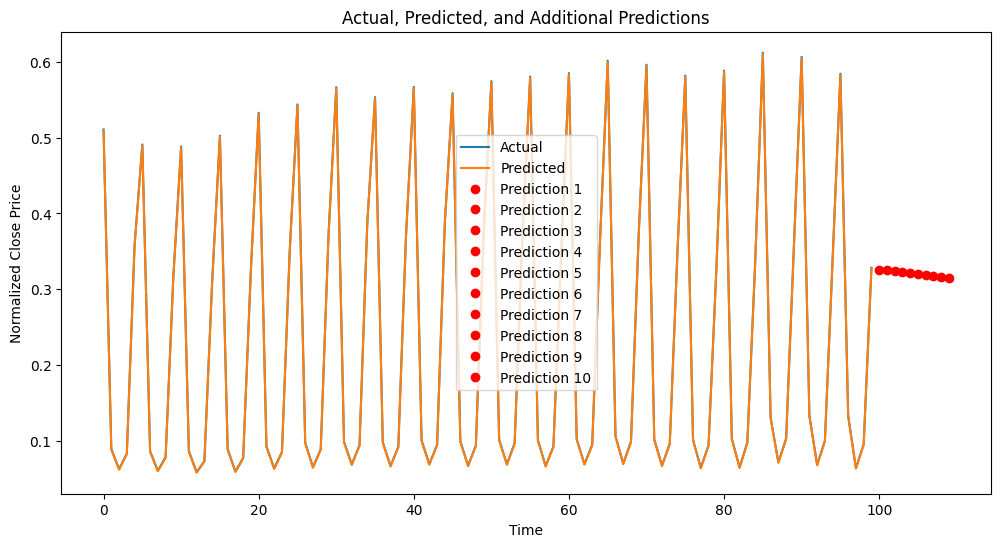

In [ ]:
# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data.reshape(-1), label="Actual")
plt.plot(predictions.reshape(-1), label="Predicted")
plt.title("Actual vs Predicted")
plt.xlabel("Time")
plt.ylabel("Normalized Close Price")
plt.legend()
plt.show()

# Plot the additional predictions
plt.figure(figsize=(12, 6))
plt.plot(test_data.reshape(-1), label="Actual")
plt.plot(predictions.reshape(-1), label="Predicted")
for i, pred in enumerate(additional_predictions):
    plt.plot([len(predictions) + i], pred, 'ro', label=f"Prediction {i+1}")
plt.title("Actual, Predicted, and Additional Predictions")
plt.xlabel("Time")
plt.ylabel("Normalized Close Price")
plt.legend()
plt.show()
#In this updated code, the plots are customized to include labels for the axes and a larger figure size for better visualization. The x-axis represents time, while the y-axis represents the normalized close price. The first plot displays the actual and predicted values, while the second plot includes the additional predictions as well.

#Feel free to adjust the figure size and the axis labels based on your preferences.








Epoch 1/10
210/210 [==============================] - 8s 17ms/step - loss: 0.0218
Epoch 2/10
210/210 [==============================] - 4s 21ms/step - loss: 0.0086
Epoch 3/10
210/210 [==============================] - 3s 13ms/step - loss: 0.0035
Epoch 4/10
210/210 [==============================] - 3s 14ms/step - loss: 0.0027
Epoch 5/10
210/210 [==============================] - 3s 14ms/step - loss: 0.0019
Epoch 6/10
210/210 [==============================] - 4s 20ms/step - loss: 0.0016
Epoch 7/10
210/210 [==============================] - 3s 15ms/step - loss: 0.0014
Epoch 8/10
210/210 [==============================] - 3s 15ms/step - loss: 0.0013
Epoch 9/10
210/210 [==============================] - 3s 15ms/step - loss: 0.0013
Epoch 10/10
53/53 [==============================] - 1s 5ms/step


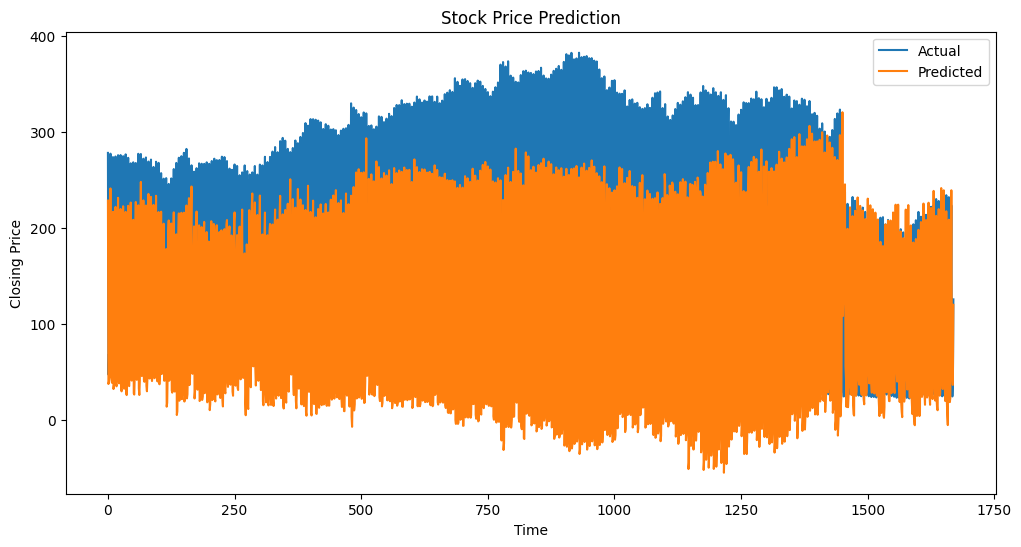

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the stock price data
data = pd.read_csv("social media stocks 2012-2022.csv")

# Extract the closing prices
close_prices = data["Close"].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(close_prices)

# Split the data into train and test sets
train_size = int(len(scaled_prices) * 0.8)
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:]

# Prepare the training data
X_train = []
y_train = []
for i in range(10, len(train_data)):
    X_train.append(train_data[i-10:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the input data for LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

# Compile and train the model
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Prepare the test data
X_test = []
y_test = close_prices[train_size+10:]  # Actual prices for evaluation
for i in range(len(test_data) - 10):
    X_test.append(test_data[i:i+10, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions on the test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual")
plt.plot(predictions, label="Predicted")
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the stock price data
data = pd.read_csv("social media stocks 2012-2022.csv")

# Extract the closing prices
close_prices = data["Close"].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(close_prices)

# Prepare the data for LSTM
X = []
y = []
lookback = 10  # Number of previous time steps to consider for prediction

for i in range(lookback, len(scaled_prices)):
    X.append(scaled_prices[i - lookback:i, 0])
    y.append(scaled_prices[i, 0])

X = np.array(X)
y = np.array(y)

# Reshape the input data for LSTM (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Create and train the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(lookback, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(X, y, epochs=10, batch_size=32)

# Use the model to predict future stock prices
num_predictions = 10  # Number of future predictions to make
last_sequence = X[-1]  # Last sequence in the data

future_predictions = []

for _ in range(num_predictions):
    next_prediction = model.predict(last_sequence.reshape(1, lookback, 1))
    future_predictions.append(next_prediction[0, 0])
    last_sequence = np.append(last_sequence[1:], next_prediction[0, 0])

# Inverse scale the predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

print("Future Predictions:")
for i, prediction in enumerate(future_predictions):
    print(f"Prediction {i+1}: {prediction[0]}")


Epoch 1/10
263/263 [==============================] - 10s 15ms/step - loss: 0.0291
Epoch 2/10
263/263 [==============================] - 3s 13ms/step - loss: 0.0203
Epoch 3/10
263/263 [==============================] - 5s 18ms/step - loss: 0.0063
Epoch 4/10
263/263 [==============================] - 4s 15ms/step - loss: 0.0025
Epoch 5/10
263/263 [==============================] - 3s 13ms/step - loss: 0.0020
Epoch 6/10
263/263 [==============================] - 4s 13ms/step - loss: 0.0017
Epoch 7/10
263/263 [==============================] - 5s 20ms/step - loss: 0.0016
Epoch 8/10
263/263 [==============================] - 3s 13ms/step - loss: 0.0014
Epoch 9/10
263/263 [==============================] - 4s 14ms/step - loss: 0.0014
Epoch 10/10
1/1 [==============================] - 0s 43ms/step
Future Predictions:
Prediction 1: 133.87539672851562
Prediction 2: 226.7222900390625
Prediction 3: 40.061744689941406
Prediction 4: 36.103118896484375
Prediction 5: 36.37613296508789
Prediction 6: 

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For time stamps
from datetime import datetime

# Define the data
data = pd.read_csv("social media stocks 2012-2022.csv")

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# The tech stocks we'll use for this analysis
tech_list = ['Open', 'High', 'Low', 'Close']

# Subset the data for the selected tech stocks
df = data.loc[:, tech_list]

# Rename the columns with more meaningful names
df.columns = ["Open", "High", "Low", "Close"]

df.tail(10)


,Open,High,Low,Close
Date,,,,
2022-04-05,234.080002,236.860001,231.020004,231.839996
2022-04-05,53.849998,54.570000,50.560001,50.980000
2022-04-05,27.400000,27.510000,26.100000,26.129999
2022-04-05,39.500000,39.799999,37.820000,38.250000
2022-04-05,135.419998,136.869995,128.610001,130.210007
2022-04-06,226.910004,228.990005,221.410004,223.300003
2022-04-06,50.040001,52.869999,49.299999,50.770000
2022-04-06,25.559999,25.559999,23.870001,24.440001
2022-04-06,37.369999,37.740002,35.639999,36.470001


In [ ]:
# Summary statistics for your data
data_stats = data.describe()
print(data_stats)


         Adj Close        Close         High          Low         Open  \
count  8398.000000  8398.000000  8398.000000  8398.000000  8398.000000   
mean     74.629153    74.629153    75.854724    73.371072    74.635965   
std      77.429806    77.429806    78.458779    76.373650    77.421378   
min       4.990000     4.990000     5.140000     4.820000     4.960000   
25%      20.832500    20.832500    21.322500    20.342500    20.812500   
50%      42.830000    42.830000    43.795000    41.873001    42.869999   
75%      94.387501    94.387501    95.687502    93.344999    94.334999   
max     382.179993   382.179993   384.329987   378.809998   381.679993   

             Volume  
count  8.398000e+03  
mean   2.013473e+07  
std    2.239180e+07  
min    1.900000e+05  
25%    7.981975e+06  
50%    1.557740e+07  
75%    2.470900e+07  
max    5.735764e+08  


In [ ]:
data_info=data.info
print(data_info)

<bound method DataFrame.info of            Symbol   Adj Close       Close        High         Low        Open  \
Date                                                                            
2012-05-18     FB   38.230000   38.230000   45.000000   38.000000   42.049999   
2012-05-21     FB   34.029999   34.029999   36.660000   33.000000   36.529999   
2012-05-22     FB   31.000000   31.000000   33.590000   30.940001   32.610001   
2012-05-23     FB   32.000000   32.000000   32.500000   31.360001   31.370001   
2012-05-24     FB   33.029999   33.029999   33.209999   31.770000   32.950001   
...           ...         ...         ...         ...         ...         ...   
2022-04-06     FB  223.300003  223.300003  228.990005  221.410004  226.910004   
2022-04-06   TWTR   50.770000   50.770000   52.869999   49.299999   50.040001   
2022-04-06   PINS   24.440001   24.440001   25.559999   23.870001   25.559999   
2022-04-06   SNAP   36.470001   36.470001   37.740002   35.639999   37.369999